# Import modules

In [73]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [74]:
import pandas as pd
df = pd.read_excel('iris (1).xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
# to display stats about data
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [77]:
# to display no. of samples on each class
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Preprocessing the dataset

In [78]:
# check for null values
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

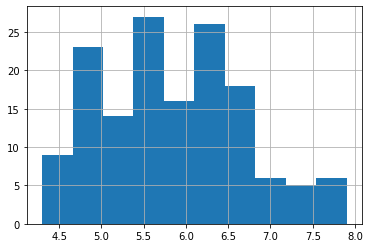

In [79]:
# histograms
df['SL'].hist()

<AxesSubplot:>

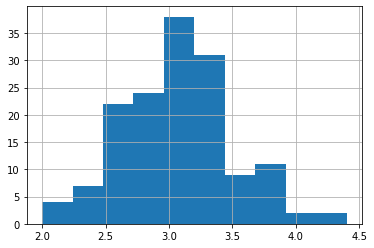

In [80]:
df['SW'].hist()

<AxesSubplot:>

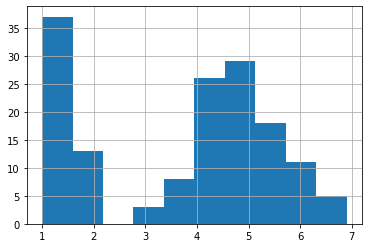

In [81]:
df['PL'].hist()

<AxesSubplot:>

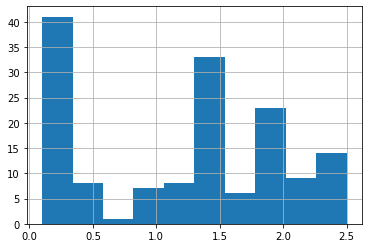

In [82]:
df['PW'].hist()

In [35]:
# scatterplot
colors = ['red', 'orange', 'blue']
Classification = ['Iris-virginica','Iris-versicolor','Iris-setosa']

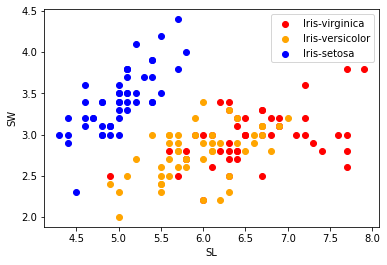

In [83]:
for i in range(3):
    x = df[df['Classification'] ==Classification[i]]
    plt.scatter(x['SL'], x['SW'], c = colors[i], label=Classification[i])
plt.xlabel("SL")
plt.ylabel("SW")
plt.legend()

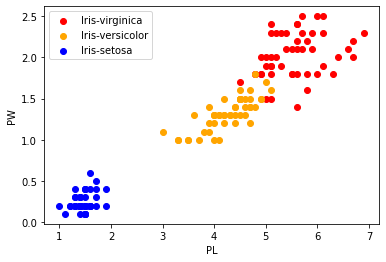

In [84]:
for i in range(3):
    x = df[df['Classification'] ==Classification[i]]
    plt.scatter(x['PL'], x['PW'], c = colors[i], label=Classification[i])
plt.xlabel("PL")
plt.ylabel("PW")
plt.legend()

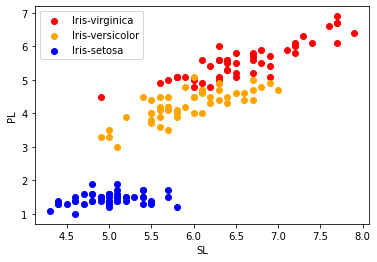

In [85]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SL'], x['PL'], c = colors[i], label=Classification[i])
plt.xlabel("SL")
plt.ylabel("PL")
plt.legend()

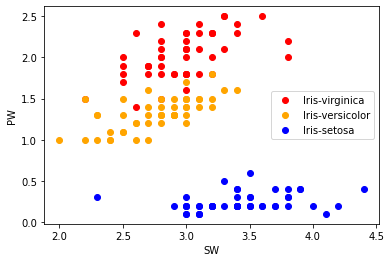

In [86]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SW'], x['PW'], c = colors[i], label=Classification[i])
plt.xlabel("SW")
plt.ylabel("PW")
plt.legend()

# Coorelation Matrix

In [87]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.109369,0.871754,0.817954
SW,-0.109369,1.000000,-0.420516,-0.356544
PL,0.871754,-0.420516,1.000000,0.962757
PW,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

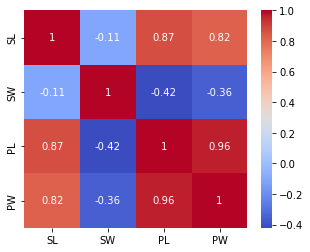

In [88]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoder

In [52]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [71]:
 #df['Classification'] = le.fit_transform(df['Classification'])
#df.head()

# Model Training

In [89]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Classification'])
Y = df['Classification']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [90]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [91]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [92]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [93]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [94]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [95]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [96]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [97]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [98]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [99]:
# save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))


In [100]:
x_test.head()

,SL,SW,PL,PW
76,6.8,2.8,4.8,1.4
75,6.6,3.0,4.4,1.4
88,5.6,3.0,4.1,1.3
25,5.0,3.0,1.6,0.2
59,5.2,2.7,3.9,1.4


In [101]:
load_model = pickle.load(open(filename,'rb'))

In [102]:
load_model.predict([[6.8, 2.8, 4.8, 1.4]])

array(['Iris-versicolor'], dtype=object)